In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [3]:
df= pd.read_csv('train.xlsx - Sheet1.csv')

# Understanding data

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.shape

(45211, 17)

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Data Cleaning

In [9]:
X= df.iloc[:,:16]
y= df.iloc[:,16:]
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

# Age

<AxesSubplot:xlabel='age'>

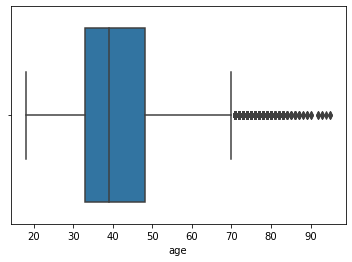

In [10]:
# outlier detection

sns.boxplot(x=X['age'])


In [11]:
# replacing the outliers with 1st and 99th percentile.

In [12]:
def outlier(X, col_name):
    p_01 = X[col_name].quantile(0.01)
    p_99 = X[col_name].quantile(0.99)
    X[col_name].clip(p_01, p_99, inplace=True)

    return X.shape


In [13]:
outlier(X, 'age')

(45211, 16)

<AxesSubplot:xlabel='age'>

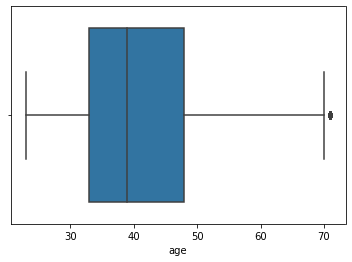

In [14]:
sns.boxplot(x=X['age'])


# job

In [15]:
(X['job'].value_counts()/len(X['job']))*100

blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64

In [16]:
# self-employed, entrepreneur,unemployed, housemaid,student,unknown are all less than 5%,
#thus, we can club them into two types and forma a new derived column.

# new derived column from job =  job_new

X['job_new']=X['job']

In [17]:
# clubbing the values in the job_new

In [18]:
def replace_value(X,col,val1, val2):
        X[col]=X[col].replace([val1], val2)
        return X[col].unique()
 

In [19]:
replace_value(X,'job_new','housemaid','self-employed')

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'student'], dtype=object)

In [20]:
replace_value(X,'job_new','entrepreneur','self-employed')

array(['management', 'technician', 'self-employed', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'unemployed',
       'student'], dtype=object)

In [21]:
replace_value(X,'job_new','student','unemployed')
# 

array(['management', 'technician', 'self-employed', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'unemployed'],
      dtype=object)

In [22]:
replace_value(X,'job_new','unknown','unemployed')

array(['management', 'technician', 'self-employed', 'blue-collar',
       'unemployed', 'retired', 'admin.', 'services'], dtype=object)

In [23]:
(X['job_new'].value_counts()/len(X['job']))*100

blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
self-employed     9.524231
services          9.188029
unemployed        5.593771
retired           5.007631
Name: job_new, dtype: float64

# marital

In [24]:
(X['marital'].value_counts()/len(X['marital']))*100

married     60.193316
single      28.289576
divorced    11.517109
Name: marital, dtype: float64

# education

In [25]:
(X['education'].value_counts()/len(X['education']))*100

secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: education, dtype: float64

# default

In [26]:
(X['default'].value_counts()/len(X['default']))*100


no     98.197341
yes     1.802659
Name: default, dtype: float64

In [27]:
# we can drop this column as it has almost no variance
X.drop('default', axis=1, inplace=True)
print(X.shape)


(45211, 16)


# balance

<AxesSubplot:xlabel='balance'>

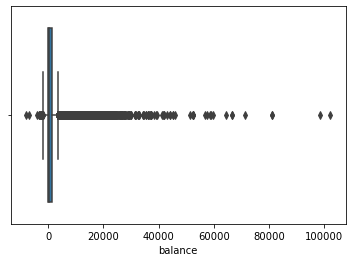

In [28]:
sns.boxplot(x=X['balance'])


In [29]:
# As it conatin outliers, we can clip it using the funcyion outlier

In [30]:
outlier(X,'balance')

(45211, 16)

<AxesSubplot:xlabel='balance'>

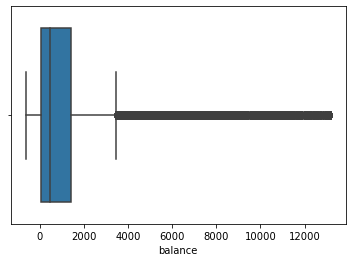

In [31]:
sns.boxplot(x=X['balance'])


# housing

In [32]:
(X['housing'].value_counts()/len(X['housing']))*100

yes    55.583818
no     44.416182
Name: housing, dtype: float64

In [33]:
#As the values in the housing column are in acceptable ration, we can keep it as it is

# loan

In [34]:
(X['loan'].value_counts()/len(X['loan']))*100

no     83.977351
yes    16.022649
Name: loan, dtype: float64

In [35]:
# As the % of no is > 75 % , we can drop it a there is almost no variance in the column

X.drop('loan', axis=1, inplace=True)
print(X.shape)


(45211, 15)


# day\

<AxesSubplot:xlabel='day'>

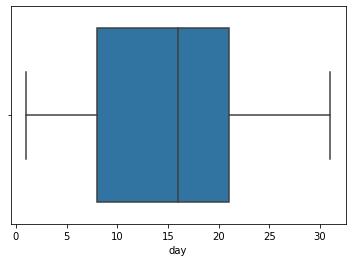

In [36]:
sns.boxplot(x=X['day'])
# no outliers
# day is a discrete numerical variable

# month

<AxesSubplot:xlabel='month', ylabel='Count'>

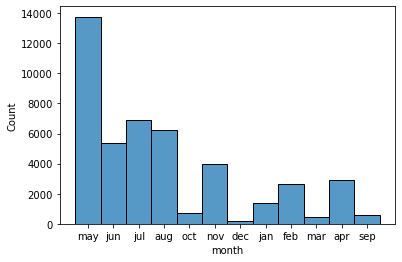

In [37]:
sns.histplot(x=X['month'])
# transform into quarters or seasons

In [38]:
(X['month'].value_counts()/len(X['month']))*100

may    30.448342
jul    15.250713
aug    13.817434
jun    11.813497
nov     8.781049
apr     6.485147
feb     5.859194
jan     3.103227
oct     1.632346
sep     1.280662
mar     1.055053
dec     0.473336
Name: month, dtype: float64

# duration

<AxesSubplot:xlabel='duration'>

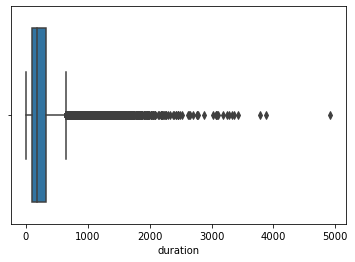

In [39]:
sns.boxplot(x=X['duration'])


In [40]:
outlier(X,'duration')

(45211, 15)

<AxesSubplot:xlabel='duration'>

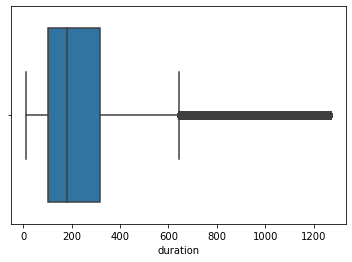

In [41]:
sns.boxplot(x=X['duration'])


# campaign

<AxesSubplot:xlabel='campaign'>

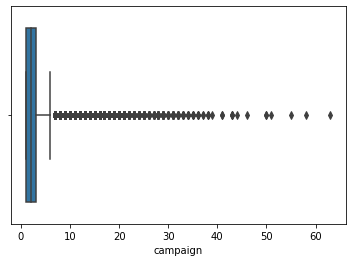

In [42]:
sns.boxplot(x=X['campaign'])


In [43]:
outlier(X,'campaign')

(45211, 15)

<AxesSubplot:xlabel='campaign'>

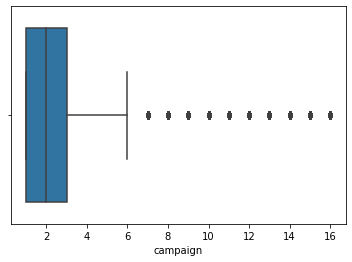

In [44]:
sns.boxplot(x=X['campaign'])


# pdays

In [45]:
X['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [46]:
#75% of data is -1, thus it has very low variance, thus we can drop it

X.drop('pdays', axis=1, inplace=True)


# previous

In [47]:
X['previous'].describe()

 

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [48]:
# 75% of data is 0, thus, we can drop it
X.drop('previous', axis=1, inplace=True)


# poutcome

In [49]:
(X['poutcome'].value_counts()/len(X['poutcome']))*100


unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: poutcome, dtype: float64

In [50]:
#unkown is 81%, very low variance, we can drop. 
X.drop('poutcome', axis=1, inplace=True)


In [51]:
X.shape

(45211, 12)

In [52]:
X.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'job_new'],
      dtype='object')

# Transforming data

### Binning age

In [53]:
# print(df['age'].unique())
print(X['age'].min())
print(X['age'].max())

23
71


In [54]:
bins= [20,30,35,40,45,50,80]
X['age_binned'] = pd.cut(X['age'], bins)
(X['age_binned'].value_counts())
X.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'job_new', 'age_binned'],
      dtype='object')

### binning months

In [55]:
X['month_bin']=X['month']

In [56]:
def month_quarter (X):
    if X['month_bin'] in ['jan','feb','mar']:
        return 'quarter 4'
    if X['month_bin'] in ['apr','may','jun']:
        return 'quarter 1'
    if X['month_bin'] in ['jul','aug','sep']:
        return 'quarter 2'
    if X['month_bin'] in ['oct','nov','dec']:
        return 'quarter 3'
    return 'N/A'





In [57]:
X['month_bin'] = X.apply(lambda X: month_quarter(X), axis=1)


In [58]:
X['month_bin'].unique()

array(['quarter 1', 'quarter 2', 'quarter 3', 'quarter 4'], dtype=object)

In [59]:
X.drop('month', axis=1, inplace=True)

In [60]:
X.shape

(45211, 13)

## transforming day to week of the month

In [61]:
X['week']=X['day']

In [62]:
def week (X):
    if X['day'] in [1,2,3,4,5,6,7]:
        return 'week_1'
    if X['day'] in [8,9,10,11,12,13,14]:
        return 'week_2'
    if X['day'] in [15,16,17,18,19,20,21]:
        return 'week_3'
    return 'week_4'





In [63]:
X['week'] = X.apply(lambda X: week(X), axis=1)


In [64]:
X['week'].unique()

array(['week_1', 'week_2', 'week_3', 'week_4'], dtype=object)

In [65]:
X.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'duration', 'campaign', 'job_new', 'age_binned', 'month_bin',
       'week'],
      dtype='object')

## balance- binning and ILATE transformation
### to find the balance parameter best describing the relation with the output/dependent variable

In [66]:
X['balance'].describe()

count    45211.000000
mean      1278.121689
std       2249.406970
min       -627.000000
25%         72.000000
50%        448.000000
75%       1428.000000
max      13164.900000
Name: balance, dtype: float64

In [67]:
bins= [-1000,0,500,2000,14000]
X['balance_binned'] = pd.cut(X['balance'], bins)
(X['balance_binned'].value_counts())
# df.columns

(0, 500]         16385
(500, 2000]      13045
(2000, 14000]     8501
(-1000, 0]        7280
Name: balance_binned, dtype: int64

In [68]:
(X['balance_binned'].value_counts()/len(X['balance_binned']))*100

(0, 500]         36.241180
(500, 2000]      28.853598
(2000, 14000]    18.802946
(-1000, 0]       16.102276
Name: balance_binned, dtype: float64

In [69]:
X['inv_balance']= np.reciprocal(X.balance)
X['log_balance'] = np.log(X.balance)
X['sq_balance'] = np.square(X.balance)
X['cube_balance'] = np.power(X.balance,3)
X['sqrt_balance'] = np.sqrt(X.balance)
X['cbrt_balance'] = np.cbrt(X.balance)
X['sin_balance'] = np.sin(X.balance)
X['cos_balance'] = np.cos(X.balance)
X['exp_balance'] = np.exp(X.balance)







C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [70]:
X.iloc[:,15:24].isnull().sum()

inv_balance        0
log_balance     3766
sq_balance         0
cube_balance       0
sqrt_balance    3766
cbrt_balance       0
sin_balance        0
cos_balance        0
exp_balance        0
dtype: int64

In [71]:
# dropping the columns with large number of null values
X.drop('sqrt_balance', axis=1, inplace=True)
X.drop('log_balance', axis=1, inplace=True)


In [72]:
bal = X.iloc[:, 15:22].copy() 


In [73]:
bal.describe()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,inv_balance,sq_balance,cube_balance,cbrt_balance,sin_balance,cos_balance,exp_balance
count,4.521100e+04,4.521100e+04,4.521100e+04,45211.000000,45211.000000,45211.000000,4.521100e+04
mean,inf,6.693315e+06,5.646782e+10,7.430709,0.021141,0.067698,inf
std,NaN,2.327781e+07,2.780413e+11,6.432831,0.687408,0.722816,NaN
min,-1.000000e+00,0.000000e+00,-2.464919e+08,-8.558990,-0.999993,-1.000000,4.981497e-273
25%,4.380201e-04,1.876900e+04,3.732480e+05,4.160168,-0.643561,-0.653644,1.858672e+31
50%,1.529052e-03,2.352250e+05,8.991539e+07,7.651725,0.000000,0.110357,3.663767e+194
75%,5.714286e-03,2.039184e+06,2.911955e+09,11.260977,0.708383,0.814041,NaN
max,inf,1.733146e+08,2.281669e+12,23.612349,0.999994,1.000000,inf


In [74]:
# dropping the columns with infinite values
X.drop('inv_balance', axis=1, inplace=True)
X.drop('exp_balance', axis=1, inplace=True)


In [75]:
{X.columns.get_loc(c): c for idx, c in enumerate(X.columns)}


{0: 'age',
 1: 'job',
 2: 'marital',
 3: 'education',
 4: 'balance',
 5: 'housing',
 6: 'contact',
 7: 'day',
 8: 'duration',
 9: 'campaign',
 10: 'job_new',
 11: 'age_binned',
 12: 'month_bin',
 13: 'week',
 14: 'balance_binned',
 15: 'sq_balance',
 16: 'cube_balance',
 17: 'cbrt_balance',
 18: 'sin_balance',
 19: 'cos_balance'}

In [76]:
# redefining bal
bal = X.iloc[:, 15:20].copy() 
# y=df['y']


In [77]:
best_features = SelectKBest(score_func=f_classif, k=1)
fit_b = best_features.fit(bal,y)
X_scores = pd.DataFrame(fit_b.scores_)
X_columns = pd.DataFrame(bal.columns)

feature_scores = pd.concat([X_columns, X_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  
res_bal= feature_scores.nlargest(5,'Score') 
res_bal

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Feature_Name,Score
2,cbrt_balance,431.248040
0,sq_balance,54.742658
1,cube_balance,23.982732
4,cos_balance,19.741261
3,sin_balance,0.029843


<AxesSubplot:xlabel='Feature_Name', ylabel='Score'>

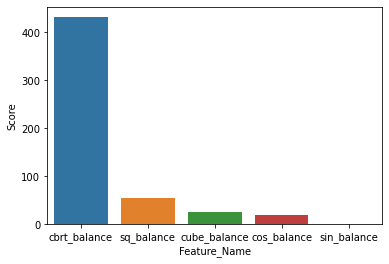

In [78]:
sns.barplot(data=res_bal, x= 'Feature_Name', y='Score')

In [79]:
# as cbrt has the highest score, we will keep and drop rest of the columns
X.drop('sq_balance', axis=1, inplace=True)
X.drop('cube_balance', axis=1, inplace=True)
X.drop('cos_balance', axis=1, inplace=True)
X.drop('sin_balance', axis=1, inplace=True)




In [80]:
X.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'duration', 'campaign', 'job_new', 'age_binned', 'month_bin',
       'week', 'balance_binned', 'cbrt_balance'],
      dtype='object')

# duration

In [81]:
X['inv_duration']= np.reciprocal(X.duration)
X['sq_duration'] = np.square(X.duration)
X['cube_duration'] = np.power(X.duration,3)
X['sqrt_duration'] = np.sqrt(X.duration)
X['cbrt_duration'] = np.cbrt(X.duration)
X['sin_duration'] = np.sin(X.duration)
X['cos_duration'] = np.cos(X.duration)
X['exp_duration'] = np.exp(X.duration)






C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [82]:
{X.columns.get_loc(c): c for idx, c in enumerate(X.columns)}


{0: 'age',
 1: 'job',
 2: 'marital',
 3: 'education',
 4: 'balance',
 5: 'housing',
 6: 'contact',
 7: 'day',
 8: 'duration',
 9: 'campaign',
 10: 'job_new',
 11: 'age_binned',
 12: 'month_bin',
 13: 'week',
 14: 'balance_binned',
 15: 'cbrt_balance',
 16: 'inv_duration',
 17: 'sq_duration',
 18: 'cube_duration',
 19: 'sqrt_duration',
 20: 'cbrt_duration',
 21: 'sin_duration',
 22: 'cos_duration',
 23: 'exp_duration'}

In [83]:
dur = X.iloc[:, 16:24].copy() # To avoid the case where changing df1 also changes df


In [84]:
dur.describe()

,inv_duration,sq_duration,cube_duration,sqrt_duration,cbrt_duration,sin_duration,cos_duration,exp_duration
count,45211.0,4.521100e+04,4.521100e+04,45211.000000,45211.000000,45211.000000,45211.000000,4.521100e+04
mean,0.0,1.198273e+05,8.540109e+07,14.591315,5.846660,-0.012354,0.013828,inf
std,0.0,2.502038e+05,2.808045e+08,6.439755,1.719330,0.707191,0.706795,NaN
min,0.0,1.210000e+02,1.331000e+03,3.316625,2.223980,-0.999991,-1.000000,5.987414e+04
25%,0.0,1.060900e+04,1.092727e+06,10.148892,4.687548,-0.714876,-0.692896,5.399228e+44
50%,0.0,3.240000e+04,5.832000e+06,13.416408,5.646216,-0.044243,0.004426,1.489384e+78
75%,0.0,1.017610e+05,3.246176e+07,17.860571,6.832771,0.696080,0.717964,3.466887e+138
max,0.0,1.610361e+06,2.043548e+09,35.623026,10.826478,0.999990,1.000000,inf


In [85]:
# dropping the columns with infinite values
X.drop('inv_duration', axis=1, inplace=True)
X.drop('exp_duration', axis=1, inplace=True)


In [86]:
{X.columns.get_loc(c): c for idx, c in enumerate(X.columns)}


{0: 'age',
 1: 'job',
 2: 'marital',
 3: 'education',
 4: 'balance',
 5: 'housing',
 6: 'contact',
 7: 'day',
 8: 'duration',
 9: 'campaign',
 10: 'job_new',
 11: 'age_binned',
 12: 'month_bin',
 13: 'week',
 14: 'balance_binned',
 15: 'cbrt_balance',
 16: 'sq_duration',
 17: 'cube_duration',
 18: 'sqrt_duration',
 19: 'cbrt_duration',
 20: 'sin_duration',
 21: 'cos_duration'}

In [87]:
# redefining dur
dur = X.iloc[:, 16:22].copy() 


In [88]:
dur


,sq_duration,cube_duration,sqrt_duration,cbrt_duration,sin_duration,cos_duration
0,68121,17779581,16.155494,6.390677,-0.245281,-0.969452
1,22801,3442951,12.288206,5.325074,0.202150,0.979355
2,5776,438976,8.717798,4.235824,0.566108,0.824331
3,8464,778688,9.591663,4.514357,-0.779466,-0.626444
4,39204,7762392,14.071247,5.828477,-0.079579,-0.996829
...,...,...,...,...,...,...
45206,954529,932574833,31.256999,9.922738,0.035308,-0.999376
45207,207936,94818816,21.354157,7.697002,-0.452053,-0.891991
45208,1270129,1431435383,33.570821,10.406579,0.739120,-0.673574
45209,258064,131096512,22.538855,7.979112,-0.806383,0.591394


In [89]:
# best_features = SelectKBest(score_func=f_classif, k=1)
# fit = best_features.fit(dur,y)
# X_scores_d = pd.DataFrame(fit.scores_)
# X_columns_d = pd.DataFrame(dur.columns)

# feature_scores_dur = pd.concat([X_columns_d, X_scores_d],axis=1)
# feature_scores.columns = ['F

best_features = SelectKBest(score_func=f_classif, k=1)
fit_d = best_features.fit(dur,y)
X_scores1 = pd.DataFrame(fit_d.scores_)
X_columns1 = pd.DataFrame(dur.columns)
print(X_columns1)

feature_scores1 = pd.concat([X_columns1, X_scores1],axis=1)
print(feature_scores1)
feature_scores1.columns = ['Feature_Name1','Score1']  
res_dur= feature_scores1.nlargest(6,'Score1') 
res_dur


               0
0    sq_duration
1  cube_duration
2  sqrt_duration
3  cbrt_duration
4   sin_duration
5   cos_duration
               0            0
0    sq_duration  7665.137150
1  cube_duration  5742.731509
2  sqrt_duration  8381.112486
3  cbrt_duration  7754.967814
4   sin_duration     0.570388
5   cos_duration    19.012119


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Feature_Name1,Score1
2,sqrt_duration,8381.112486
3,cbrt_duration,7754.967814
0,sq_duration,7665.137150
1,cube_duration,5742.731509
5,cos_duration,19.012119
4,sin_duration,0.570388


<AxesSubplot:xlabel='Feature_Name1', ylabel='Score1'>

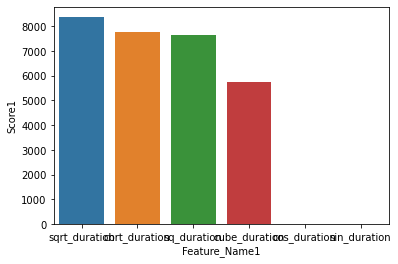

In [90]:
sns.barplot(data=res_dur, x= 'Feature_Name1', y='Score1')

In [91]:
# as cbrt has the highest score, we will keep and drop rest of the columns
X.drop('cos_duration', axis=1, inplace=True)
X.drop('sin_duration', axis=1, inplace=True)


In [92]:
X.shape
X.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'duration', 'campaign', 'job_new', 'age_binned', 'month_bin',
       'week', 'balance_binned', 'cbrt_balance', 'sq_duration',
       'cube_duration', 'sqrt_duration', 'cbrt_duration'],
      dtype='object')

# Data preparation

## Balance

In [93]:
cat= X.select_dtypes(include=['object']).columns.tolist()
cat

['job',
 'marital',
 'education',
 'housing',
 'contact',
 'job_new',
 'month_bin',
 'week']

In [94]:
dum =pd.get_dummies(data=X, columns=['job',
 'marital',
 'education',
 'housing',
 'contact',
 'job_new',
 'month_bin',
 'week'], 
)
dum

,age,balance,day,duration,campaign,age_binned,balance_binned,cbrt_balance,sq_duration,cube_duration,...,job_new_technician,job_new_unemployed,month_bin_quarter 1,month_bin_quarter 2,month_bin_quarter 3,month_bin_quarter 4,week_week_1,week_week_2,week_week_3,week_week_4
0,58,2143.0,5,261,1,"(50, 80]","(2000, 14000]",12.892606,68121,17779581,...,0,0,1,0,0,0,1,0,0,0
1,44,29.0,5,151,1,"(40, 45]","(0, 500]",3.072317,22801,3442951,...,1,0,1,0,0,0,1,0,0,0
2,33,2.0,5,76,1,"(30, 35]","(0, 500]",1.259921,5776,438976,...,0,0,1,0,0,0,1,0,0,0
3,47,1506.0,5,92,1,"(45, 50]","(500, 2000]",11.462385,8464,778688,...,0,0,1,0,0,0,1,0,0,0
4,33,1.0,5,198,1,"(30, 35]","(0, 500]",1.000000,39204,7762392,...,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825.0,17,977,3,"(50, 80]","(500, 2000]",9.378887,954529,932574833,...,1,0,0,0,1,0,0,0,1,0
45207,71,1729.0,17,456,2,"(50, 80]","(500, 2000]",12.002314,207936,94818816,...,0,0,0,0,1,0,0,0,1,0
45208,71,5715.0,17,1127,5,"(50, 80]","(2000, 14000]",17.878816,1270129,1431435383,...,0,0,0,0,1,0,0,0,1,0
45209,57,668.0,17,508,4,"(50, 80]","(500, 2000]",8.741625,258064,131096512,...,0,0,0,0,1,0,0,0,1,0


In [95]:
X = pd.concat([X, dum], axis = 1)


In [96]:
X.shape
X.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'duration', 'campaign', 'job_new', 'age_binned', 'month_bin',
       'week', 'balance_binned', 'cbrt_balance', 'sq_duration',
       'cube_duration', 'sqrt_duration', 'cbrt_duration', 'age', 'balance',
       'day', 'duration', 'campaign', 'age_binned', 'balance_binned',
       'cbrt_balance', 'sq_duration', 'cube_duration', 'sqrt_duration',
       'cbrt_duration', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'housing_no', 'housing_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'job_new_admin.',
       'job_new_blue-collar', 'job_new_ma

In [97]:
X.drop(['job',
 'marital',
 'education',
 'housing',
 'contact',
 'job_new',
 'month_bin',
 'week']
, axis=1, inplace=True)

In [98]:
X.shape

(45211, 64)

In [99]:
X.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'age_binned',
       'balance_binned', 'cbrt_balance', 'sq_duration', 'cube_duration',
       'sqrt_duration', 'cbrt_duration', 'age', 'balance', 'day', 'duration',
       'campaign', 'age_binned', 'balance_binned', 'cbrt_balance',
       'sq_duration', 'cube_duration', 'sqrt_duration', 'cbrt_duration',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'housing_no', 'housing_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'job_new_admin.',
       'job_new_blue-collar', 'job_new_management', 'job_new_retired',
       'job_new_self-employed', 'job_new_services', 'job_new_t

In [117]:
X.drop(['age_binned','balance_binned'], axis=1, inplace=True)

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =101)
# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)
# y_train

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [121]:
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_svc = SVC()


In [123]:
model_dt.fit(X_train, y_train)
y_pred_dt =model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [124]:
model_rf.fit(X_train, y_train)
y_pred_rf =model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

<ipython-input-124-b662ffa725fe>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train, y_train)


In [125]:
model_svc.fit(X_train, y_train)
y_pred_svc =model_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [126]:
print(f'the accuracy for Decision Tree is {accuracy_dt}')
print(f'the accuracy for Random forest is {accuracy_rf}')
print(f'the accuracy for SVM is {accuracy_svc}')


the accuracy for Decision Tree is 0.8607762910538538
the accuracy for Random forest is 0.8910759703638174
the accuracy for SVM is 0.8877584872276899


In [127]:
cm_dt= (confusion_matrix(y_test, y_pred_dt))
cm_rf= (confusion_matrix(y_test, y_pred_rf))
cm_svc= (confusion_matrix(y_test, y_pred_svc))

In [131]:
from sklearn.metrics import classification_report
target_names =['no', 'yes']
print('Classifictaion report for decision tree')
print('-------------------------')
print(classification_report(y_test, y_pred_dt, target_names=target_names))
print('Classifictaion report for random forest')
print('-------------------------')
print(classification_report(y_test, y_pred_rf, target_names=target_names))
print('Classifictaion report for SVC')
print('-------------------------')
print(classification_report(y_test, y_pred_svc, target_names=target_names))

Classifictaion report for decision tree
-------------------------
              precision    recall  f1-score   support

          no       0.92      0.92      0.92      7944
         yes       0.43      0.41      0.42      1099

    accuracy                           0.86      9043
   macro avg       0.67      0.67      0.67      9043
weighted avg       0.86      0.86      0.86      9043

Classifictaion report for random forest
-------------------------
              precision    recall  f1-score   support

          no       0.91      0.97      0.94      7944
         yes       0.61      0.29      0.39      1099

    accuracy                           0.89      9043
   macro avg       0.76      0.63      0.67      9043
weighted avg       0.87      0.89      0.87      9043

Classifictaion report for SVC
-------------------------
              precision    recall  f1-score   support

          no       0.90      0.99      0.94      7944
         yes       0.63      0.18      0.29      